In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.externals import joblib

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import svm  
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [3]:
# 从 csv 读取数据
def pre_data():
    # 41 维表头
    column_names = []
    for i in range(0, 43):
        column_names.append("feature_" + str(i + 1))
    column_names.append("output")

    # read csv
    rd_csv = pd.read_csv("drive/MyDrive/MasterThesis/finalData.csv", names=column_names)
    
    # 输出 csv 文件的维度
    print("shape:", rd_csv.shape)

    X_train, X_test, y_train, y_test = train_test_split(

        rd_csv[column_names[0:43]],
        rd_csv[column_names[43]],

        # 20% for testing, 80% for training
        test_size=0.20,
        random_state=42)

    return X_train, X_test, y_train, y_test


path_models = "drive/MyDrive/MasterThesis/"



In [4]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import cross_val_score



# def K_Flod_spilt(K,fold,data,label):
#     '''
#     :param K: 要把数据集分成的份数。如十次十折取K=10
#     :param fold: 要取第几折的数据。如要取第5折则 flod=5
#     :param data: 需要分块的数据
#     :param label: 对应的需要分块标签
#     :return: 对应折的训练集、测试集和对应的标签
#     '''
#     split_list = []
#     kf = KFold(n_splits=K)
#     for train, test in kf.split(data):
#         split_list.append(train.tolist())
#         split_list.append(test.tolist())
#     train,test=split_list[2 * fold],split_list[2 * fold + 1]
#     return  data[train], data[test], label[train], label[test] 

In [5]:
column_names = []
for i in range(0, 43):
    column_names.append("feature_" + str(i + 1))
column_names.append("output")

rd_csv = pd.read_csv("drive/MyDrive/MasterThesis/finalData.csv", names=column_names)

# Data Visualization

1078


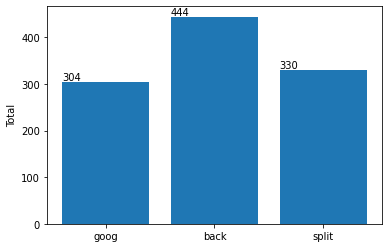

In [ ]:
label = rd_csv[column_names[43]]
num = [len(label.loc[label=='g']), len(label.loc[label=='b']), len(label.loc[label=='s'])]
print(len(label))
nailNumber = rd_csv[column_names[42]]
types = ['goog', 'back', 'split']
import matplotlib.pyplot as plt
index = np.arange(len(types))

fig, ax = plt.subplots()
def auto_text(rects):
    for rect in rects:
        ax.text(rect.get_x(), rect.get_height(), rect.get_height(), ha='left', va='bottom')
rect1 = ax.bar(index, num)
ax.set_xticks(ticks=index)
ax.set_xticklabels(types)
ax.set_ylabel("Total")
auto_text(rect1)

plt.show()


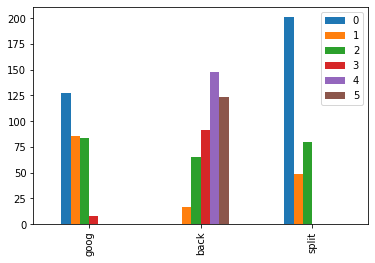

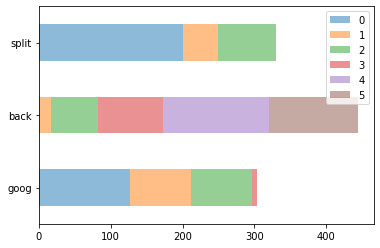

In [ ]:
tempData = rd_csv[column_names[42:]]
# print(len(tempData.loc[(tempData['feature_43' ]==0) & (tempData['output']=='g')]))
df = pd.DataFrame({
 '0':pd.Series([len(tempData.loc[(tempData['feature_43' ]==0) & (tempData['output']=='g')]), len(tempData.loc[(tempData['feature_43' ]==0) & (tempData['output']=='b')]), len(tempData.loc[(tempData['feature_43' ]==0) & (tempData['output']=='s')])],index=types),
 '1':pd.Series([len(tempData.loc[(tempData['feature_43' ]==1) & (tempData['output']=='g')]), len(tempData.loc[(tempData['feature_43' ]==1) & (tempData['output']=='b')]), len(tempData.loc[(tempData['feature_43' ]==1) & (tempData['output']=='s')])],index=types),
 '2':pd.Series([len(tempData.loc[(tempData['feature_43' ]==2) & (tempData['output']=='g')]), len(tempData.loc[(tempData['feature_43' ]==2) & (tempData['output']=='b')]), len(tempData.loc[(tempData['feature_43' ]==2) & (tempData['output']=='s')])],index=types),
 '3':pd.Series([len(tempData.loc[(tempData['feature_43' ]==3) & (tempData['output']=='g')]), len(tempData.loc[(tempData['feature_43' ]==3) & (tempData['output']=='b')]), len(tempData.loc[(tempData['feature_43' ]==3) & (tempData['output']=='s')])],index=types),
 '4':pd.Series([len(tempData.loc[(tempData['feature_43' ]==4) & (tempData['output']=='g')]), len(tempData.loc[(tempData['feature_43' ]==4) & (tempData['output']=='b')]), len(tempData.loc[(tempData['feature_43' ]==4) & (tempData['output']=='s')])],index=types),
 '5':pd.Series([len(tempData.loc[(tempData['feature_43' ]==5) & (tempData['output']=='g')]), len(tempData.loc[(tempData['feature_43' ]==5) & (tempData['output']=='b')]), len(tempData.loc[(tempData['feature_43' ]==5) & (tempData['output']=='s')])],index=types)
})

df.plot.bar() # 水平柱状图，将每一行中的值分组到并排的柱子中的一组
df.plot.barh(stacked=True,alpha=0.5) # 横向柱状图，将每一行的值堆积到一起

# Models Building and Training

The accurary of LR: 0.7037037037037037
The accurary of LR: 0.6851851851851852
The accurary of LR: 0.7407407407407407
The accurary of LR: 0.6666666666666666
The accurary of LR: 0.5740740740740741
The accurary of LR: 0.7592592592592593
The accurary of LR: 0.7592592592592593
The accurary of LR: 0.5925925925925926
The accurary of LR: 0.7222222222222222
The accurary of LR: 0.6851851851851852
The accurary of LR: 0.5740740740740741
The accurary of LR: 0.7407407407407407
The accurary of LR: 0.8148148148148148
The accurary of LR: 0.6851851851851852
The accurary of LR: 0.9259259259259259
The accurary of LR: 0.6666666666666666
The accurary of LR: 0.7407407407407407
The accurary of LR: 0.7037037037037037
The accurary of LR: 0.6037735849056604
The accurary of LR: 0.660377358490566
Final accuracy: (0.7002445842068484, 0.08176458239654333)


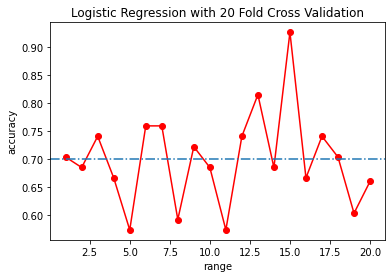

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
# LR：logistic regression
# 10 fold cross validation
def model_LR_10_Fold():
    # get data
    X = rd_csv[column_names[0:43]]
    y = rd_csv[column_names[43]]
    scores = []
    # 数据预加工
    # 标准化数据，保证每个维度的特征数据方差为1，均值为0。使得预测结果不会被某些维度过大的特征值而主导
    skf = StratifiedKFold(n_splits=20).split(X, y)
    # 初始化 LogisticRegression
    LR = LogisticRegression(penalty='l2',max_iter=500)
    for train_index, test_index in skf:
        X_train_LR, X_test_LR = X.iloc[train_index], X.iloc[test_index]
        y_train_LR, y_test_LR = y.iloc[train_index], y.iloc[test_index]
        ss_LR = StandardScaler()
        X_train_LR = ss_LR.fit_transform(X_train_LR)
        X_test_LR = ss_LR.transform(X_test_LR)

        # 调用 LogisticRegression 中的 fit() 来训练模型参数
        LR.fit(X_train_LR, y_train_LR)
        score_LR = LR.score(X_test_LR, y_test_LR)
        print("The accurary of LR:", score_LR)
        scores.append(score_LR)

    # save LR model
    joblib.dump(LR, path_models + "model_LR_10Kold.m")

    # 评分函数
    # scrosses = cross_val_score(estimator=LR, X = X, y = y, cv=10, n_jobs=1)
    # # score_LR = LR.score(X_test_LR, y_test_LR)
    # print("The accurary of LR:", scrosses)
    print("Final accuracy:", (np.mean(scores), np.std(scores)))
    plt.plot(np.arange(1,21),scores, linestyle = '-',color = 'r',marker = 'o')
    plt.axhline(y=np.mean(scores),linestyle = '-.', label='mean')
    plt.title('Logistic Regression with 20 Fold Cross Validation')  
    plt.xlabel('range')  
    plt.ylabel('accuracy') 
    plt.show()
    return (ss_LR)

model_LR_10_Fold()

In [ ]:
# LR：logistic regression
def model_LR():
    # get data
    X_train_LR, X_test_LR, y_train_LR, y_test_LR = pre_data()

    # 数据预加工
    # 标准化数据，保证每个维度的特征数据方差为1，均值为0。使得预测结果不会被某些维度过大的特征值而主导
    ss_LR = StandardScaler()
    X_train_LR = ss_LR.fit_transform(X_train_LR)
    X_test_LR = ss_LR.transform(X_test_LR)

    # 初始化 LogisticRegression
    LR = LogisticRegression(penalty='l2',max_iter=500)

    # 调用 LogisticRegression 中的 fit() 来训练模型参数
    LR.fit(X_train_LR, y_train_LR)

    # save LR model
    joblib.dump(LR, path_models + "model_LR.m")

    # 评分函数
    score_LR = LR.score(X_test_LR, y_test_LR)
    print("The accurary of LR:", score_LR)

    print(type(ss_LR))
    return (ss_LR)

model_LR()

shape: (1078, 44)
The accurary of LR: 0.7592592592592593
<class 'sklearn.preprocessing._data.StandardScaler'>


StandardScaler(copy=True, with_mean=True, with_std=True)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


The accurary of LSVC: 0.6481481481481481


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


The accurary of LSVC: 0.7037037037037037


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


The accurary of LSVC: 0.7222222222222222


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


The accurary of LSVC: 0.6481481481481481


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


The accurary of LSVC: 0.5925925925925926


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


The accurary of LSVC: 0.7037037037037037


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


The accurary of LSVC: 0.7592592592592593


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


The accurary of LSVC: 0.5740740740740741


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


The accurary of LSVC: 0.6666666666666666


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


The accurary of LSVC: 0.7037037037037037


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


The accurary of LSVC: 0.5925925925925926


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


The accurary of LSVC: 0.7222222222222222


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


The accurary of LSVC: 0.7962962962962963


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


The accurary of LSVC: 0.6666666666666666


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


The accurary of LSVC: 0.8888888888888888


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


The accurary of LSVC: 0.6481481481481481


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


The accurary of LSVC: 0.7037037037037037


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


The accurary of LSVC: 0.7037037037037037


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


The accurary of LSVC: 0.5849056603773585


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


The accurary of LSVC: 0.660377358490566
Final accuracy: (0.6844863731656186, 0.07373642439077989)


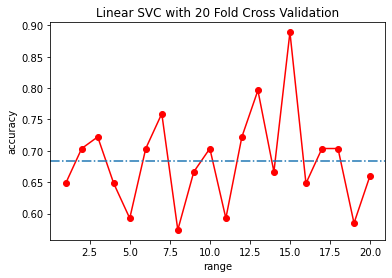

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
# Linear SVC， Linear Supported Vector Classifier, 线性支持向量分类(SVM支持向量机)
# 10 Fold Cross Validation
def model_LSVC_10Fold():
    # get data
    X = rd_csv[column_names[0:43]]
    y = rd_csv[column_names[43]]
    scores = []
    # 数据预加工
    skf = StratifiedKFold(n_splits=20).split(X, y)
    # 初始化 LSVC
    LSVC = LinearSVC()
    for train_index, test_index in skf:
        X_train_LSVC, X_test_LSVC = X.iloc[train_index], X.iloc[test_index]
        y_train_LSVC, y_test_LSVC = y.iloc[train_index], y.iloc[test_index]
        ss_LSVC = StandardScaler()
        X_train_LSVC = ss_LSVC.fit_transform(X_train_LSVC)
        X_test_LSVC = ss_LSVC.transform(X_test_LSVC)

        # 调用 LSVC 中的 fit() 来训练模型参数
        LSVC.fit(X_train_LSVC, y_train_LSVC)
        score_LSVC = LSVC.score(X_test_LSVC, y_test_LSVC)
        print("The accurary of LSVC:", score_LSVC)
        scores.append(score_LSVC)

    # save LSVC model
    joblib.dump(LSVC, path_models + "model_LSVC_20Fold.m")

    # 评分函数
    # scrosses = cross_val_score(estimator=LSVC, X = X, y = y, cv=10, n_jobs=1)
    # # score_LR = LR.score(X_test_LR, y_test_LR)
    # print("The accurary of LSVC:", scrosses)

    print("Final accuracy:", (np.mean(scores), np.std(scores)))
    plt.plot(np.arange(1,21),scores, linestyle = '-',color = 'r',marker = 'o')
    plt.axhline(y=np.mean(scores),linestyle = '-.', label='mean')
    plt.title('Linear SVC with 20 Fold Cross Validation')  
    plt.xlabel('range')  
    plt.ylabel('accuracy') 
    plt.show()

    return ss_LSVC


model_LSVC_10Fold()

In [ ]:
# Linear SVC， Linear Supported Vector Classifier, 线性支持向量分类(SVM支持向量机)
def model_LSVC():
    # get data
    X_train_LSVC, X_test_LSVC, y_train_LSVC, y_test_LSVC = pre_data()

    # 数据预加工
    ss_LSVC = StandardScaler()
    X_train_LSVC = ss_LSVC.fit_transform(X_train_LSVC)
    X_test_LSVC = ss_LSVC.transform(X_test_LSVC)

    # 初始化 LSVC
    LSVC = LinearSVC()

    # 调用 LSVC 中的 fit() 来训练模型参数
    LSVC.fit(X_train_LSVC, y_train_LSVC)

    # save LSVC model
    joblib.dump(LSVC, path_models + "model_LSVC.m")

    # 评分函数
    score_LSVC = LSVC.score(X_test_LSVC, y_test_LSVC)
    print("The accurary of LSVC:", score_LSVC)

    return ss_LSVC


model_LSVC()

shape: (1078, 44)


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


The accurary of LSVC: 0.7361111111111112


StandardScaler(copy=True, with_mean=True, with_std=True)

The accurary of SVC: 0.7222222222222222
The accurary of SVC: 0.6851851851851852
The accurary of SVC: 0.6851851851851852
The accurary of SVC: 0.7777777777777778
The accurary of SVC: 0.6111111111111112
The accurary of SVC: 0.8888888888888888
The accurary of SVC: 0.9629629629629629
The accurary of SVC: 0.6296296296296297
The accurary of SVC: 0.8148148148148148
The accurary of SVC: 0.6851851851851852
The accurary of SVC: 0.5740740740740741
The accurary of SVC: 0.7962962962962963
The accurary of SVC: 0.8518518518518519
The accurary of SVC: 0.7592592592592593
The accurary of SVC: 0.9629629629629629
The accurary of SVC: 0.8148148148148148
The accurary of SVC: 0.8518518518518519
The accurary of SVC: 0.8703703703703703
The accurary of SVC: 0.7735849056603774
The accurary of SVC: 0.8301886792452831
SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None,

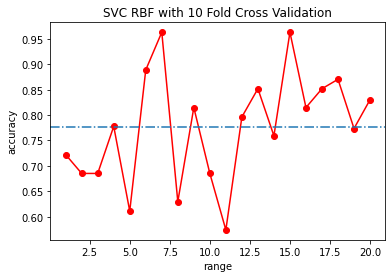

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
# SVC实现了非线性分类支持向量机
# 10 Fold Corss Validation

from sklearn.svm import SVC

# param_grid = [
#   {'C': [1, 10, 100], 'kernel': ['linear']},
#   {'C': [1, 10, 100], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
# ]

def model_SVC_10Fold():
    # get data
    X = rd_csv[column_names[0:43]]
    y = rd_csv[column_names[43]]
    scores = []
    # 数据预加工
    skf = StratifiedKFold(n_splits=20).split(X, y)
    # 初始化 SVC
    SVC_g = GridSearchCV(SVC(), param_grid={"C":[1e-3, 1e-2, 1e-1, 1, 10, 100], "gamma":[1, 0.1, 0.01, 0.001, 0.0001]}, cv=5)
    # SVC_g = SVC(C=100, gamma=0.1, kernel='rbf')
    for train_index, test_index in skf:
        X_train_SVC, X_test_SVC = X.iloc[train_index], X.iloc[test_index]
        y_train_SVC, y_test_SVC = y.iloc[train_index], y.iloc[test_index]

        # 数据预加工
        ss_SVC = StandardScaler()
        X_train_SVC = ss_SVC.fit_transform(X_train_SVC)
        X_test_SVC = ss_SVC.transform(X_test_SVC)
        # SVC_g = GridSearchCV(SVC_model, param_grid, cv=3)

        # 调用 SVC 中的 fit() 来训练模型参数
        SVC_g.fit(X_train_SVC, y_train_SVC)
        score_SVC = SVC_g.score(X_test_SVC, y_test_SVC)
        scores.append(score_SVC)
        print("The accurary of SVC:", score_SVC)
    print(SVC_g.best_estimator_)

    # save SVC model
    joblib.dump(SVC_g, path_models + "model_SVC_20Fold.m")

    # 评分函数
    # scrosses = cross_val_score(estimator=SVC_g, X = X, y = y, cv=10, n_jobs=1)
    # # score_LR = LR.score(X_test_LR, y_test_LR)
    # print("The accurary of SVC:", scrosses)

    print("Final accuracy:", (np.mean(scores), np.std(scores)))
    plt.plot(np.arange(1,21),scores, linestyle = '-',color = 'r',marker = 'o')
    plt.axhline(y=np.mean(scores),linestyle = '-.', label='mean')
    plt.title('SVC RBF with 20 Fold Cross Validation')  
    plt.xlabel('range')  
    plt.ylabel('accuracy') 
    plt.show()

    return ss_SVC


model_SVC_10Fold()

In [ ]:
# SVC实现了非线性分类支持向量机
from sklearn.svm import SVC

# param_grid = [
#   {'C': [1, 10, 100], 'kernel': ['linear']},
#   {'C': [1, 10, 100], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
# ]

def model_SVC():
    # get data
    X_train_SVC, X_test_SVC, y_train_SVC, y_test_SVC = pre_data()

    # 数据预加工
    ss_SVC = StandardScaler()
    X_train_SVC = ss_SVC.fit_transform(X_train_SVC)
    X_test_SVC = ss_SVC.transform(X_test_SVC)

    # 初始化 SVC
    # SVC_g = SVC(param_grid, verbose=1, probability=True)
    
    # SVC_g = GridSearchCV(SVC_model, param_grid, cv=3)
    SVC_g = GridSearchCV(SVC(), param_grid={"C":[1e-3, 1e-2, 1e-1, 1, 10, 100], "gamma":[0.01]}, cv=5)

    # 调用 SVC 中的 fit() 来训练模型参数
    SVC_g.fit(X_train_SVC, y_train_SVC)

    # best_model = SVC_g.best_estimator_

    # save SVC model
    joblib.dump(SVC_g, path_models + "model_SVC.m")

    # 评分函数
    score_SVC = SVC_g.score(X_test_SVC, y_test_SVC)
    print("The accurary of SVC:", score_SVC)

    print(SVC_g.best_params_)

    return ss_SVC


model_SVC()



shape: (1078, 44)
The accurary of SVC: 0.8796296296296297
{'C': 100, 'gamma': 0.01}


StandardScaler(copy=True, with_mean=True, with_std=True)

The accurary of SVC: 0.7592592592592593
The accurary of SVC: 0.7962962962962963
The accurary of SVC: 0.6666666666666666
The accurary of SVC: 0.6481481481481481
The accurary of SVC: 0.7407407407407407
The accurary of SVC: 0.9074074074074074
The accurary of SVC: 0.6851851851851852
The accurary of SVC: 0.6666666666666666
The accurary of SVC: 0.7407407407407407
The accurary of SVC: 0.7222222222222222
The accurary of SVC: 0.6296296296296297
The accurary of SVC: 0.7592592592592593
The accurary of SVC: 0.7777777777777778
The accurary of SVC: 0.7222222222222222
The accurary of SVC: 0.9074074074074074
The accurary of SVC: 0.7777777777777778
The accurary of SVC: 0.7777777777777778
The accurary of SVC: 0.8888888888888888
The accurary of SVC: 0.6415094339622641
The accurary of SVC: 0.7169811320754716
Final accuracy: (0.7466282320055906, 0.08086234030982192)


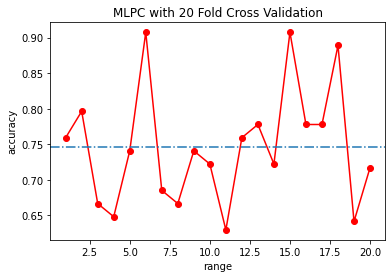

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
# MLPC, Multi-layer Perceptron Classifier, 多层感知机分类（神经网络）
# 10 Fold Cross Validation
def model_MLPC_10Fold():
    # get data
    X = rd_csv[column_names[0:43]]
    y = rd_csv[column_names[43]]
    scores = []
    # 数据预加工
    skf = StratifiedKFold(n_splits=20).split(X, y)

    # 初始化 MLPC
    MLPC = MLPClassifier(hidden_layer_sizes=(13, 13, 13), max_iter=800)
    for train_index, test_index in skf:
        X_train_MLPC, X_test_MLPC = X.iloc[train_index], X.iloc[test_index]
        y_train_MLPC, y_test_MLPC = y.iloc[train_index], y.iloc[test_index]

        ss_MLPC = StandardScaler()
        X_train_MLPC = ss_MLPC.fit_transform(X_train_MLPC)
        X_test_MLPC = ss_MLPC.transform(X_test_MLPC)

        

        # 调用 MLPC 中的 fit() 来训练模型参数
        MLPC.fit(X_train_MLPC, y_train_MLPC)
        score_MLPC = MLPC.score(X_test_MLPC, y_test_MLPC)
        scores.append(score_MLPC)
        print("The accurary of SVC:", score_MLPC)

    # save MLPC model
    joblib.dump(MLPC, path_models + "model_MLPC_20Fold.m")

    # 评分函数
    
    print("Final accuracy:", (np.mean(scores), np.std(scores)))
    plt.plot(np.arange(1,21),scores, linestyle = '-',color = 'r',marker = 'o')
    plt.axhline(y=np.mean(scores),linestyle = '-.', label='mean')
    plt.title('MLPC with 20 Fold Cross Validation')  
    plt.xlabel('range')  
    plt.ylabel('accuracy') 
    plt.show()

    return (ss_MLPC)

model_MLPC_10Fold()

In [ ]:
# MLPC, Multi-layer Perceptron Classifier, 多层感知机分类（神经网络）
def model_MLPC():
    # get data
    X_train_MLPC, X_test_MLPC, y_train_MLPC, y_test_MLPC = pre_data()

    # 数据预加工
    ss_MLPC = StandardScaler()
    X_train_MLPC = ss_MLPC.fit_transform(X_train_MLPC)
    X_test_MLPC = ss_MLPC.transform(X_test_MLPC)

    # 初始化 MLPC
    MLPC = MLPClassifier(hidden_layer_sizes=(13, 13, 13), max_iter=800)

    # 调用 MLPC 中的 fit() 来训练模型参数
    MLPC.fit(X_train_MLPC, y_train_MLPC)

    # save MLPC model
    joblib.dump(MLPC, path_models + "model_MLPC.m")

    # 评分函数
    score_MLPC = MLPC.score(X_test_MLPC, y_test_MLPC)
    print("The accurary of MLPC:", score_MLPC)

    return (ss_MLPC)

model_MLPC()

shape: (1078, 44)
The accurary of MLPC: 0.8194444444444444


StandardScaler(copy=True, with_mean=True, with_std=True)

The accurary of MLPC: 0.6851851851851852
The accurary of MLPC: 0.8703703703703703
The accurary of MLPC: 0.8888888888888888
The accurary of MLPC: 0.7592592592592593
The accurary of MLPC: 0.6851851851851852
The accurary of MLPC: 0.9074074074074074
The accurary of MLPC: 0.8703703703703703
The accurary of MLPC: 0.5555555555555556
The accurary of MLPC: 0.7222222222222222
The accurary of MLPC: 0.6666666666666666
The accurary of MLPC: 0.6666666666666666
The accurary of MLPC: 0.7962962962962963
The accurary of MLPC: 0.8148148148148148
The accurary of MLPC: 0.7407407407407407
The accurary of MLPC: 0.9074074074074074


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


The accurary of MLPC: 0.7962962962962963
The accurary of MLPC: 0.9074074074074074
The accurary of MLPC: 0.9444444444444444
The accurary of MLPC: 0.7358490566037735
The accurary of MLPC: 0.6981132075471698
Final accuracy: (0.7809573724668064, 0.10335946541899606)


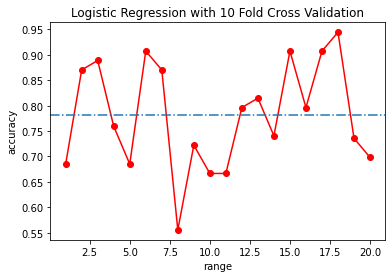

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
# MLPC, Multi-layer Perceptron Classifier, 多层感知机分类（神经网络）
#10 Fold Cross Validation
def model_MLPC2_10Fold():
    # get data
    X = rd_csv[column_names[0:43]]
    y = rd_csv[column_names[43]]
    scores = []
    # 数据预加工
    skf = StratifiedKFold(n_splits=20).split(X, y)
    cls = MLPClassifier(solver='lbfgs', activation='tanh',alpha=1e-3,
                        hidden_layer_sizes=(16, 64, 16), max_iter=1000)
    for train_index, test_index in skf:
        X_train_MLPC, X_test_MLPC = X.iloc[train_index], X.iloc[test_index]
        y_train_MLPC, y_test_MLPC = y.iloc[train_index], y.iloc[test_index]
        ss_MLPC = StandardScaler()
        X_train_MLPC = ss_MLPC.fit_transform(X_train_MLPC)
        X_test_MLPC = ss_MLPC.transform(X_test_MLPC)

        cls.fit(X_train_MLPC, y_train_MLPC)
        score_MLPC = cls.score(X_test_MLPC, y_test_MLPC)
        scores.append(score_MLPC)
        print("The accurary of MLPC:", score_MLPC)

    # save MLPC model
    joblib.dump(cls, path_models + "model_MLPC2_20Fold.m")

    # 评分函数
    
    print("Final accuracy:", (np.mean(scores), np.std(scores)))
    plt.plot(np.arange(1,21),scores, linestyle = '-',color = 'r',marker = 'o')
    plt.axhline(y=np.mean(scores),linestyle = '-.', label='mean')
    plt.title('Logistic Regression with 10 Fold Cross Validation')  
    plt.xlabel('range')  
    plt.ylabel('accuracy') 
    plt.show()

    return (ss_MLPC)


model_MLPC2_10Fold()

In [ ]:
# MLPC, Multi-layer Perceptron Classifier, 多层感知机分类（神经网络）
def model_MLPC2():
    # get data
    X_train_MLPC, X_test_MLPC, y_train_MLPC, y_test_MLPC = pre_data()

    # 数据预加工
    ss_MLPC = StandardScaler()
    X_train_MLPC = ss_MLPC.fit_transform(X_train_MLPC)
    X_test_MLPC = ss_MLPC.transform(X_test_MLPC)


    cls = MLPClassifier(solver='lbfgs', activation='tanh',alpha=1e-3,
                        hidden_layer_sizes=(16, 64, 16), max_iter=1000)
    cls.fit(X_train_MLPC, y_train_MLPC)

    # save MLPC model
    joblib.dump(cls, path_models + "model_MLPC2.m")

    # 评分函数
    score_MLPC = cls.score(X_test_MLPC, y_test_MLPC)
    print("The accurary of MLPC:", score_MLPC)

    return (ss_MLPC)


model_MLPC2()

shape: (1078, 44)
The accurary of MLPC: 0.8379629629629629


StandardScaler(copy=True, with_mean=True, with_std=True)

# Validation

In [6]:
def model_MLPC2_20Fold():
    # get data
    X = rd_csv[column_names[0:43]]
    y = rd_csv[column_names[43]]
    scores = []
    # 数据预加工
    skf = StratifiedKFold(n_splits=20).split(X, y)
    cls = MLPClassifier(solver='lbfgs', activation='tanh',alpha=1e-3,
                        hidden_layer_sizes=(16, 64, 16), max_iter=1000)
    for train_index, test_index in skf:
        X_train_MLPC, X_test_MLPC = X.iloc[train_index], X.iloc[test_index]
        y_train_MLPC, y_test_MLPC = y.iloc[train_index], y.iloc[test_index]
        ss_MLPC = StandardScaler()
        X_train_MLPC = ss_MLPC.fit_transform(X_train_MLPC)
        X_test_MLPC = ss_MLPC.transform(X_test_MLPC)

        cls.fit(X_train_MLPC, y_train_MLPC)
        score_MLPC = cls.score(X_test_MLPC, y_test_MLPC)
        scores.append(score_MLPC)

    # save MLPC model
    joblib.dump(cls, path_models + "model_MLPC2_20Fold.m")


    return (ss_MLPC)


In [12]:
import json
import os
import numpy as np
testPath = 'drive/MyDrive/MasterThesis/test/'
fileNames = os.listdir(testPath)
name = '4s05.txt'
f = open(testPath+name, "r")
data = json.load(f)
points = data[0].get('hand_parts')

testInput = []
for i in range(21):
  testInput.append(int(points[str(i)].get('x')))
  testInput.append(int(points[str(i)].get('y')))
testInput.append(int(name[-6]))
print(testInput)

MLPC = joblib.load(path_models + "model_MLPC2_20Fold.m")
ss_MLPC = model_MLPC2_20Fold()
X_test_MLPC = ss_MLPC.transform([testInput])
y_predict_MLPC = str(MLPC.predict(X_test_MLPC)[0])
print("MLPC:", y_predict_MLPC)



[1023, 1641, 1274, 1445, 1414, 1277, 1414, 1109, 1414, 886, 1246, 942, 1274, 774, 1274, 606, 1274, 438, 1107, 942, 1107, 746, 1135, 578, 1163, 354, 967, 970, 967, 802, 995, 634, 1023, 438, 827, 1026, 827, 914, 855, 802, 883, 634, 0]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPC: s


# Dataset Analysis